<a href="https://colab.research.google.com/github/varuncode01/SIH_Files/blob/main/crop_price_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIH1/Price_Agriculture_commodities_Week.csv')

In [ ]:
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...,...,...
23088,Uttrakhand,Haridwar,Roorkee,Mango,Other,Medium,02-08-2023,800.0,1200.0,1000.0
23089,Uttrakhand,Haridwar,Roorkee,Mousambi(Sweet Lime),Other,Medium,02-08-2023,1500.0,2500.0,2000.0
23090,Uttrakhand,Haridwar,Roorkee,Pear(Marasebu),Other,Medium,02-08-2023,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,Other,FAQ,02-08-2023,900.0,1800.0,1500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [ ]:
df.nunique()

,0
State,27
District,403
Market,1289
Commodity,234
Variety,452
Grade,4
Arrival_Date,7
Min Price,1793
Max Price,2073
Modal Price,2071


In [ ]:
df["Arrival_Date"]

,Arrival_Date
0,27-07-2023
1,27-07-2023
2,27-07-2023
3,27-07-2023
4,27-07-2023
...,...
23088,02-08-2023
23089,02-08-2023
23090,02-08-2023
23091,02-08-2023


In [ ]:
df['Grade'].unique()

array(['FAQ', 'Large', 'Medium', 'Small'], dtype=object)

In [ ]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price'],
      dtype='object')

In [ ]:
# New dataframe so i don't ruin original dataframe

In [ ]:
df2 = pd.DataFrame()

In [ ]:
# Replace text(unique values) with numbers in these columns
df2['State'] = df['State'].astype('category').cat.codes
df2['District'] = df['District'].astype('category').cat.codes
df2['Market'] = df['Market'].astype('category').cat.codes
df2['Commodity'] = df['Commodity'].astype('category').cat.codes
df2['Variety'] = df['Variety'].astype('category').cat.codes
df2['Grade'] = df['Grade'].astype('category').cat.codes

In [ ]:
df2['Min Price'] = df['Min Price']
df2['Max Price'] = df['Max Price']

In [ ]:
df2

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price
0,6,12,309,22,57,0,4100.0,4500.0
1,6,12,309,28,311,0,2200.0,3000.0
2,6,12,309,32,81,0,2350.0,3000.0
3,6,12,309,40,87,0,7000.0,7500.0
4,6,12,309,60,112,0,8400.0,9000.0
...,...,...,...,...,...,...,...,...
23088,25,144,1025,137,311,2,800.0,1200.0
23089,25,144,1025,148,311,2,1500.0,2500.0
23090,25,144,1025,165,311,2,2000.0,3000.0
23091,25,144,1025,175,311,0,900.0,1800.0


In [ ]:
df2.corr()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price
State,1.000000,-0.105156,-0.074029,0.092157,-0.153660,-0.007290,-0.073047,-0.123196
District,-0.105156,1.000000,0.389171,-0.003934,0.030322,0.005608,0.024767,0.033663
Market,-0.074029,0.389171,1.000000,-0.009142,0.014995,0.003537,0.048077,0.048210
Commodity,0.092157,-0.003934,-0.009142,1.000000,0.374992,-0.050282,-0.097973,-0.100830
Variety,-0.153660,0.030322,0.014995,0.374992,1.000000,0.049990,0.006845,0.021528
Grade,-0.007290,0.005608,0.003537,-0.050282,0.049990,1.000000,0.017998,0.030275
Min Price,-0.073047,0.024767,0.048077,-0.097973,0.006845,0.017998,1.000000,0.954383
Max Price,-0.123196,0.033663,0.048210,-0.100830,0.021528,0.030275,0.954383,1.000000


In [ ]:
combo_counts = df2.groupby(
    ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price']
).size().reset_index(name='Count')

# Sort by frequency (descending)
combo_counts = combo_counts.sort_values('Count', ascending=False)

# Show most and least common combinations
print("Most Common Combinations:")
print(combo_counts.head(10))

print("\nLeast Common Combinations:")
print(combo_counts.tail(10))

Most Common Combinations:
       State  District  Market  Commodity  Variety  Grade  Min Price  \
15422     24       146    1083        154      350      0      900.0   
4677      11         6     455         14      304      2     5000.0   
4680      11         6     455         18      311      0     4000.0   
4681      11         6     455         22      311      0     4000.0   
4682      11         6     455         23      311      0     5000.0   
4673      11         6     455          4      311      0     4000.0   
4674      11         6     455          6      311      0     5000.0   
12056     22       247     359        160      214      0     2060.0   
4696      11         6     455         40      311      0     4000.0   
4684      11         6     455         27      311      0     2000.0   

       Max Price  Count  
15422     1000.0      6  
4677      5500.0      6  
4680      4500.0      6  
4681      4500.0      6  
4682      5500.0      6  
4673      4500.0      6  

In [ ]:
# Group by combination and count
combo_counts = df2.groupby(
    ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',  'Min Price', 'Max Price']
).size().reset_index(name='Count')

# Find rare combinations (less than 5)
rare_combos = combo_counts[combo_counts['Count'] < 5]
print(f"Number of rare combinations: {len(rare_combos)}")

Number of rare combinations: 19187


In [ ]:
# New Dataframe with balanced combinations

In [ ]:
# 1. Group by combination and count
combo_counts = df.groupby(
    ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price']
).size().reset_index(name='Count')

# 2. Merge counts back into original dataframe, save as df3_with_counts
df3_with_counts = df.merge(combo_counts, on=['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price'])

# 3. Separate rare and common combos in df3
rare = df3_with_counts[df3_with_counts['Count'] < 5]
common = df3_with_counts[df3_with_counts['Count'] >= 5]

# 4. Upsample rare combos to at least 5 rows
upsampled = (
    rare.groupby(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price'])
    .apply(lambda x: x.sample(n=5, replace=True))
    .reset_index(drop=True)
)

# 5. Combine common and upsampled rare into df3_balanced
df3_balanced = pd.concat([common.drop(columns='Count'), upsampled.drop(columns='Count')], ignore_index=True)

print("Original rows:", len(df))
print("New balanced dataframe rows:", len(df3_balanced))

Original rows: 23093
New balanced dataframe rows: 96113


/tmp/ipython-input-4255571884.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=5, replace=True))


In [ ]:
df3_balanced.head(20)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Himachal Pradesh,Kangra,Palampur,Banana,Banana - Ripe,Medium,27-07-2023,3500.0,4000.0,3750.0
1,Himachal Pradesh,Kangra,Palampur,Beetroot,Beetroot,FAQ,27-07-2023,3500.0,4000.0,3750.0
2,Himachal Pradesh,Kangra,Palampur,Bitter gourd,Other,FAQ,27-07-2023,3500.0,4000.0,3750.0
3,Himachal Pradesh,Kangra,Palampur,Cabbage,Cabbage,FAQ,27-07-2023,2200.0,2500.0,2350.0
4,Himachal Pradesh,Kangra,Palampur,Carrot,Carrot,FAQ,27-07-2023,3000.0,3500.0,3250.0
5,Himachal Pradesh,Kangra,Palampur,Onion,Other,FAQ,27-07-2023,2000.0,2200.0,2100.0
6,Himachal Pradesh,Kangra,Palampur,Papaya,Other,Medium,27-07-2023,4200.0,4500.0,4350.0
7,Himachal Pradesh,Kangra,Palampur,Pineapple,Other,Medium,27-07-2023,4500.0,5000.0,4750.0
8,Himachal Pradesh,Kangra,Palampur,Potato,Other,FAQ,27-07-2023,1700.0,2100.0,1900.0
9,Kerala,Alappuzha,Harippad,Amaranthus,Other,FAQ,27-07-2023,4000.0,4500.0,4000.0


In [ ]:
# Balanced Dataframe with Category(unique values) in numbers

In [ ]:
df4 = pd.DataFrame()

In [ ]:
# Replace text(unique values) with numbers in these columns
df4['State'] = df3_balanced['State'].astype('category').cat.codes
df4['District'] = df3_balanced['District'].astype('category').cat.codes
df4['Market'] = df3_balanced['Market'].astype('category').cat.codes
df4['Commodity'] = df3_balanced['Commodity'].astype('category').cat.codes
df4['Variety'] = df3_balanced['Variety'].astype('category').cat.codes
df4['Grade'] = df3_balanced['Grade'].astype('category').cat.codes

In [ ]:
df4['Min Price'] = df3_balanced['Min Price']
df4['Max Price'] = df3_balanced['Max Price']

In [ ]:
df4

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price
0,8,184,901,14,44,2,3500.0,4000.0
1,8,184,901,18,50,0,3500.0,4000.0
2,8,184,901,23,311,0,3500.0,4000.0
3,8,184,901,32,81,0,2200.0,2500.0
4,8,184,901,37,84,0,3000.0,3500.0
...,...,...,...,...,...,...,...,...
96108,26,384,987,227,256,0,2300.0,2400.0
96109,26,384,987,227,256,0,2300.0,2400.0
96110,26,384,987,227,256,0,2300.0,2400.0
96111,26,384,987,227,256,0,2300.0,2400.0


In [ ]:
df4.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Min Price', 'Max Price'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df4.drop(['Min Price', 'Max Price'], axis=1)
Y = df4[['Min Price', 'Max Price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,State,District,Market,Commodity,Variety,Grade
49074,19,50,175,154,311,0
23986,11,108,34,32,81,0
43305,13,387,1277,20,37,0
37646,13,160,928,199,445,0
44240,15,93,385,79,272,0
...,...,...,...,...,...,...
6265,6,294,1109,13,129,0
54886,20,59,212,130,311,2
76820,24,143,1053,82,166,0
860,4,57,210,135,311,0


In [ ]:
y_train

,Min Price,Max Price
49074,1500.0,1500.0
23986,2000.0,3000.0
43305,4600.0,5050.0
37646,4800.0,4850.0
44240,18000.0,24000.0
...,...,...
6265,1500.0,2380.0
54886,3800.0,4000.0
76820,6450.0,6550.0
860,1600.0,2000.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()

In [ ]:
# Fit on training data, transform both train and test
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the base model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Wrap it to support multiple outputs
model = MultiOutputRegressor(rf)

# Train the model
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
# Separate predictions
pred_max = y_pred[:, 1]
pred_min = y_pred[:, 0]

true_max = y_test['Max Price'].values
true_min = y_test['Min Price'].values

# MAX PRICE METRICS
print("🔹 MAX PRICE METRICS:")
print("MAE:", mean_absolute_error(true_max, pred_max))
print("RMSE:", np.sqrt(mean_squared_error(true_max, pred_max)))
print("R² Score:", r2_score(true_max, pred_max))

# MIN PRICE METRICS
print("\n🔹 MIN PRICE METRICS:")
print("MAE:", mean_absolute_error(true_min, pred_min))
print("RMSE:", np.sqrt(mean_squared_error(true_min, pred_min)))
print("R² Score:", r2_score(true_min, pred_min))

🔹 MAX PRICE METRICS:
MAE: 237.3562312448067
RMSE: 730.785138074841
R² Score: 0.9890861690808872

🔹 MIN PRICE METRICS:
MAE: 217.8651171715986
RMSE: 722.4142013890772
R² Score: 0.9857917586445177


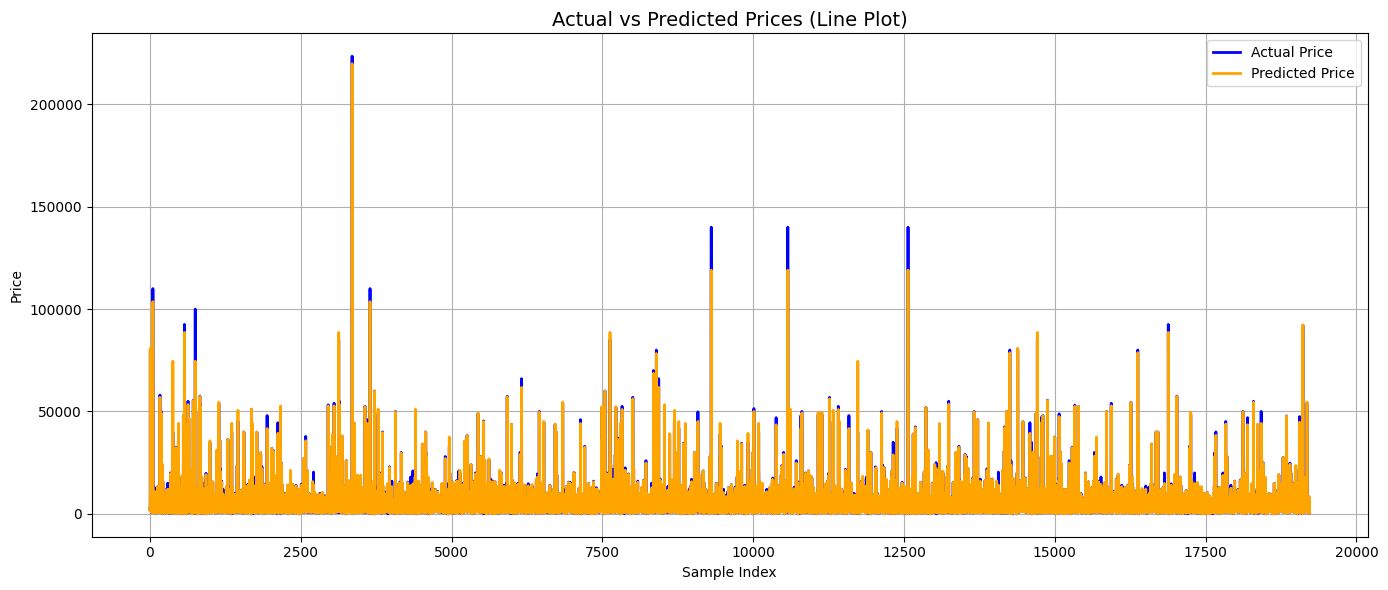

In [ ]:
import matplotlib.pyplot as plt

# Sample example — assuming you're working with min_price only
actual_values = y_test['Min Price'].values
predicted_values = y_pred[:, 0]  # 0 if Min Price, 1 if Max Price

# Optionally, sort by actual value or sample index
plt.figure(figsize=(14, 6))
plt.plot(actual_values, label='Actual Price', color='blue', linewidth=2)
plt.plot(predicted_values, label='Predicted Price', color='orange', linewidth=2)

plt.title('Actual vs Predicted Prices (Line Plot)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers.default = "colab"

trace_actual = go.Scatter(y=actual_values, mode='lines', name='Actual Price', line=dict(color='blue'))
trace_predicted = go.Scatter(y=predicted_values, mode='lines', name='Predicted Price', line=dict(color='orange'))

fig = go.Figure(data=[trace_actual, trace_predicted])
fig.update_layout(title='Actual vs Predicted Prices', xaxis_title='Sample Index', yaxis_title='Price')

pio.show(fig)


In [ ]:
import joblib

# Example: assume your model variable is `model`
joblib.dump(model, 'price_predictor_rf.pkl')

['price_predictor_rf.pkl']

In [ ]:
category_mapping = {}

for col in ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']:
    category_mapping[col] = list(df[col].astype('category').cat.categories)

import joblib
joblib.dump(category_mapping, 'category_mapping2.pkl')

['category_mapping2.pkl']